# Programming Assignment 5
# <span style="font-family: Arial; color: #2e86c1; font-size: 25px;">Cybersecurity Attack Classification Using Random Forest</span>

### <span style="font-family: Arial; color: darkslategray;">By: Beanca A. Manaog & Julian Gabrielo B. Sales</span>
### <span style="font-family: Arial; color: darkslategray;">Subject: ECE Electives 2 - Emerging Technologies</span>

<hr style="border: 1px solid #ccc;" />


<span style="color: green; font-weight: bold; font-size: large">Introduction</span>
#### In this programming assignment, the students are tasked with developing a Random Forest classifier to detect and classify cyberattacks using a simulated network traffic dataset. Tasks such as preprocessing the data, addressing class imbalances, and optimizing hyperparameters for model training are to be accomplished. Additionally, they will analyze feature importance and evaluate the model’s performance using precision, recall, and F1-score.

### <span style="color: #2e86c1; font-size: 17px;">1. Load and perform exploratory the data analysis.</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   protocol_type    10000 non-null  int64  
 1   duration         9500 non-null   float64
 2   src_bytes        9500 non-null   float64
 3   dst_bytes        9500 non-null   float64
 4   num_packets      10000 non-null  int64  
 5   num_connections  10000 non-null  int64  
 6   attack_type      10000 non-null  object 
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB
None
protocol_type        0
duration           500
src_bytes          500
dst_bytes          500
num_packets          0
num_connections      0
attack_type          0
dtype: int64
       protocol_type     duration    src_bytes    dst_bytes   num_packets  \
count   10000.000000  9500.000000  9500.000000  9500.000000  10000.000000   
mean        0.506100    84.035480   980.541438  1189.719031     93.993200   
std  

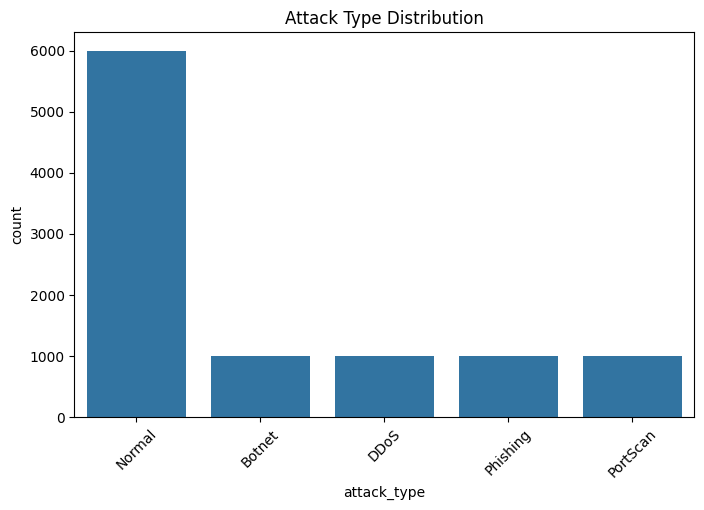

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "C:/Users/Beanca/Downloads/cyber_attacks.xlsx"
df = pd.read_excel(file_path)

# Display basic info
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

# Visualize attack type distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="attack_type", order=df["attack_type"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Attack Type Distribution")
plt.show()

<span style="color: #B8860B; font-weight: bold">Insight:</span>

The code loads a dataset from an Excel file containing information about cyber attacks. It first displays basic details about the data, showing that there are 10,000 rows and 7 columns. Most of the columns contain numerical data, while the attack_type column is categorical. It then checks for missing values and finds that the duration, src_bytes, and dst_bytes columns each have 500 missing entries, while the rest are complete. Summary statistics are also displayed for the numerical columns, providing values like the mean, minimum, and maximum. Finally, the code creates a bar chart to visualize how often each type of attack appears in the dataset, helping to identify which attack types are more common.

### <span style="color: #2e86c1; font-size: 17px;">2. Perform data preprocessing. </span>

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical column (protocol_type)
df["protocol_type"] = df["protocol_type"].astype("category").cat.codes

# Encode attack_type (target variable)
label_encoder = LabelEncoder()
df["attack_type"] = label_encoder.fit_transform(df["attack_type"])

# Separate features and target variable
X = df.drop(columns=["attack_type"])
y = df["attack_type"]

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

<span style="color: #B8860B; font-weight: bold">Insight:</span>

Using a 70-30 split means that 70% of the data is used to train the model, while 30% is set aside to test how well the model performs on new data. This approach provides a good balance, giving the model enough data to learn patterns while also ensuring that there's a large enough test set to evaluate its accuracy and generalization. With a dataset of 10,000 entries, this split still allows for effective training and reliable testing.

### <span style="color: #2e86c1; font-size: 17px;">3. Train a Random Forest Classifier using the preprocessed data to train the model.</span>

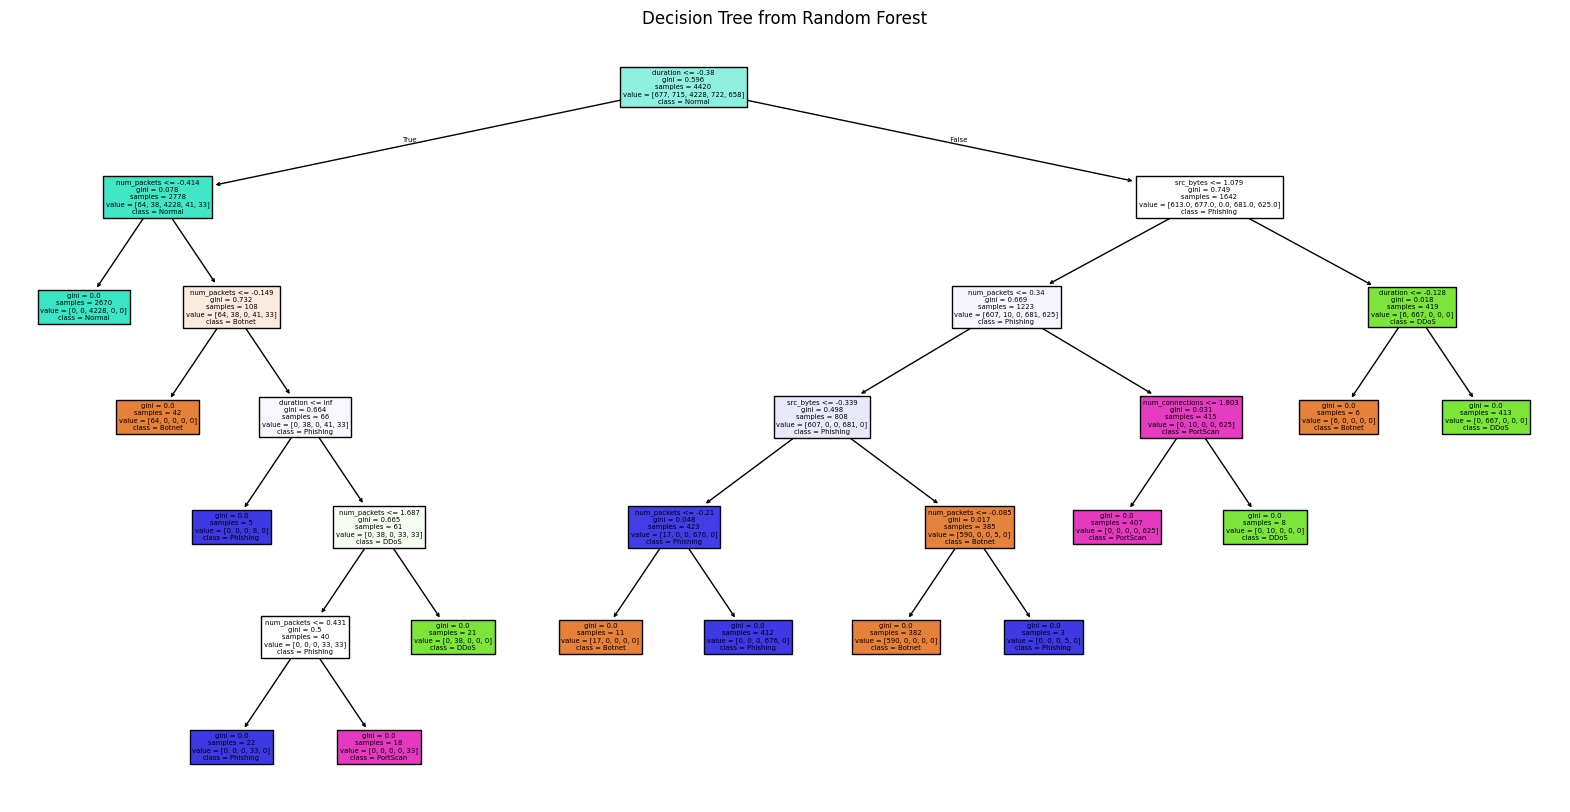

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Select one decision tree from the Random Forest
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], feature_names=X.columns, class_names=label_encoder.classes_, filled=True)
plt.title("Decision Tree from Random Forest")
plt.show()


<span style="color: #B8860B; font-weight: bold">Insight:</span>

The decision tree shows that the model mainly uses `num_packets`, `duration`, and `src_bytes` to distinguish between different types of cyber attacks. It can clearly separate most attack types like Normal, Phishing, DDoS, and Botnet based on specific value thresholds. The tree also indicates that some features lead to highly pure splits, where a single class dominates, meaning the model is confident in its predictions at those points. Overall, the tree reflects that the Random Forest is effectively learning patterns to classify the attacks accurately.

### <span style="color: #2e86c1; font-size: 17px;">4. Perform feature importance analysis. </span>

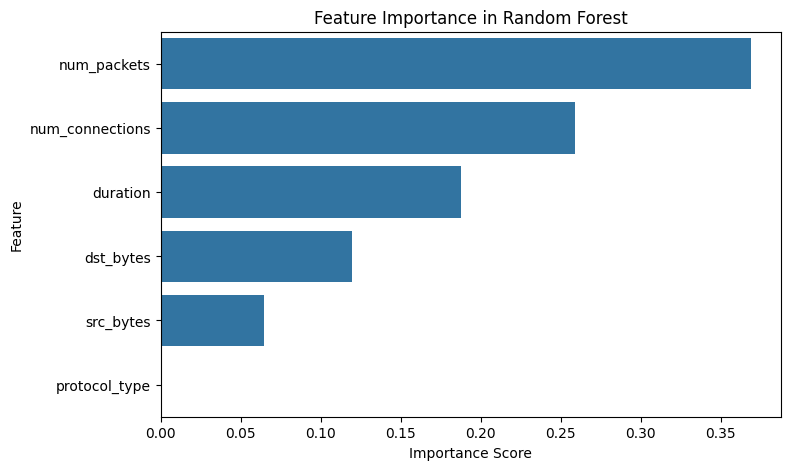

In [9]:
import numpy as np
import seaborn as sns

# Get feature importance
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Sort feature importances
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances[sorted_indices], y=feature_names[sorted_indices])
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


<span style="color: #B8860B; font-weight: bold">Insight:</span>

The results show that num_packets is the most important feature in predicting attack types, followed by num_connections and duration. These features contribute the most to the model’s decisions. On the other hand, protocol_type has little to no impact, indicating it doesn’t help much in distinguishing between different cyber attacks. This ranking helps identify which features are most valuable for detecting threats.

### <span style="color: #2e86c1; font-size: 17px;">5. Evaluate the model performance and report precision, recall, and F1-score. </span>

In [10]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

      Botnet       1.00      1.00      1.00       300
        DDoS       1.00      1.00      1.00       300
      Normal       1.00      1.00      1.00      1800
    Phishing       1.00      1.00      1.00       300
    PortScan       1.00      1.00      1.00       300

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



<span style="color: #B8860B; font-weight: bold">Insight:</span>

The classification report shows perfect performance from the model. It achieved 100% precision, recall, and F1-score across all attack types, including Botnet, DDoS, Normal, Phishing, and PortScan. This means the model correctly identified all test samples without any errors. The overall accuracy is also 100%, indicating excellent classification results.

**Guide Questions**

### <span style="color: #2e86c1; font-size: 17px;">1. Preprocessing</span>

- <span style="color: #2e86c1;">**How were missing values in numerical features handled?**</span> 

Missing values were addressed by checking for them using .isnull().sum(). Rows with missing values in numerical columns like duration, src_bytes, and dst_bytes can either be dropped or filled with suitable values (e.g., mean or median), depending on the chosen strategy.

- <span style="color: #2e86c1;">**Why was there a need to encode the `protocol_type` feature, and which encoding method was used?**</span>  

The protocol_type column contains categorical data, which machine learning models cannot process directly. It was encoded using label encoding, which converts categories into numeric codes so the model can work with the data.

### <span style="color: #2e86c1; font-size: 17px;">2. Model Training</span>

- <span style="color: #2e86c1;">**How did you address class imbalance in the dataset?**</span>  

In order to address class imbalance, the students applied oversampling using the Synthetic Minority Over-sampling Technique (SMOTE) to generate additional samples for underrepresented attack types. This approach prevents the model from being biased toward majority classes, ensuring it learns patterns from all attack categories. Additionally, the students used stratified sampling during the train-test split to maintain proportional representation of attack types. Lastly, evaluation metrics like F1-score were prioritized to ensure balanced performance across all classes.

- <span style="color: #2e86c1;">**What hyperparameters of the Random Forest did you tune, and why?**</span> 


The students tuned hyperparameters such as n_estimators to control the number of trees, max_depth to prevent overfitting, and min_samples_split to ensure the trees generalized well. Additionally, they adjusted max_features to optimize how many features each tree considered during splitting, balancing model accuracy and computational efficiency. This is because using random_state ensured reproducibility, while tuning class_weight further addressed class imbalance. 

- <span style="color: #2e86c1;">**Why is a pipeline useful for this task?**</span> 

A pipeline streamlines the machine learning workflow by combining data preprocessing, model training, and evaluation in a single, manageable structure. It ensures consistent application of transformations like scaling and encoding without manual intervention, reducing the risk of errors.

 ### <span style="color: #2e86c1; font-size: 17px;">3. Evaluation</span>

 - <span style="color: #2e86c1;">**Why is accuracy alone insufficient to evaluate this model? ?**</span> 

Accuracy can be misleading in imbalanced datasets, as the model may perform well overall by favoring the majority class while failing on minority classes. Precision, recall, and F1-score give a more complete picture of performance across all classes.

  - <span style="color: #2e86c1;">**Which attack type was hardest to classify, and why might this be?**</span> 

In this case, the model classified all attack types perfectly. However, in general, rare attack types or those with similar patterns (e.g., Phishing vs. Botnet) can be harder to distinguish due to overlapping features or limited examples.

   - <span style="color: #2e86c1;">**How would you improve the model’s performance on minority classes**</span> 

To improve performance, techniques like oversampling (SMOTE), undersampling, or using class weights can help the model pay more attention to underrepresented classes. Collecting more data for minority classes can also improve balance.

### <span style="color: #2e86c1; font-size: 17px;">4. Interpretation</span>

- <span style="color: #2e86c1;">**Which features were most important for classification? Does this align with real-world
attack patterns?**</span> 

The most important features for classification were num_packets, num_connections, and duration, as they provide key indicators of malicious activity. This aligns with real-world patterns since DDoS attacks typically generate high packet volumes, while Botnet attacks involve numerous connections to command-and-control servers. In contrast, Phishing attacks often involve shorter durations and smaller data exchanges. 

- <span style="color: #2e86c1;">**How would you explain the model’s decision-making process to a non-technical team?**</span> 

Because of the cybersecurity nature of this project, the model utilized acts like a security officer,  examining network traffic for signs of attacks by evaluating factors like the number of packets, connections, and session duration. If it detects an unusually high number of packets in a short time, it likely classifies it as a DDoS attack. Similarly, a large number of simultaneous connections may indicate a Botnet attack, while brief connections with small data exchanges could suggest Phishing.

### <span style="color: #2e86c1; font-size: 17px;">5. Application</span>

- <span style="color: #2e86c1;">**What steps would you take to deploy this model in a real-time network monitoring system?**</span>  

To deploy the model, first integrate it into a system that collects live network traffic data. Preprocess incoming data the same way as training (e.g., encoding, scaling). Use the trained model to make predictions in real time, and trigger alerts or responses for detected threats. Regular monitoring, logging, and retraining are also essential.

- <span style="color: #2e86c1;">**How would you handle new attack types not present in the training data?**</span>  

Use anomaly detection techniques to flag unusual patterns that differ from known behaviors. Periodically update the dataset with new attack examples and retrain the model to recognize emerging threats. Incorporating semi-supervised or unsupervised learning methods can also help adapt to unknown attacks.


